In [244]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [245]:
def get_normalized_data_matrix(X):
    m = X.shape[0]
    A = (np.eye(m) - 1./m * np.ones((m, m))) @ X
    return A

In [246]:
def scale_data(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0, ddof=1)

In [247]:
def pca(A):
    K = A.T @ A
    val, vect = np.linalg.eig(K)
    sing_val = np.sqrt(val)
    return vect, np.sqrt(1. / (A.shape[0] - 1)) * sing_val


In [248]:
def plot_data(X, principal_components=[]):
    fig, ax = plt.subplots(figsize=(10,8))
    label = [1 if i=='M' else 0 for i in class_tumor]
    colors = ['red','green']
    X = scale(X)
    ax.scatter(X[:, 0], X[:, 1], c=label, cmap=matplotlib.colors.ListedColormap(colors),s=8)
    max_val = np.max(np.abs(X))
    for v in principal_components:
        ax.plot([0, max_val * v[0]], [0, max_val * v[1]], linewidth=2)
    ax.set_xlabel(r'Компонента 1', fontsize=16)
    ax.set_ylabel(r'Компонента 2', fontsize=16)
    ax.plot(0,0, 'ko', markersize=10)
    ax.grid()
    plt.show()

In [249]:
df = pd.read_csv('wdbc.data', delimiter=',', header=None)
class_tumor =  np.array(df)[:, 1:2].T[0]
X = np.array(df)[:, 2:]
X = X.astype(np.float32, copy=True)

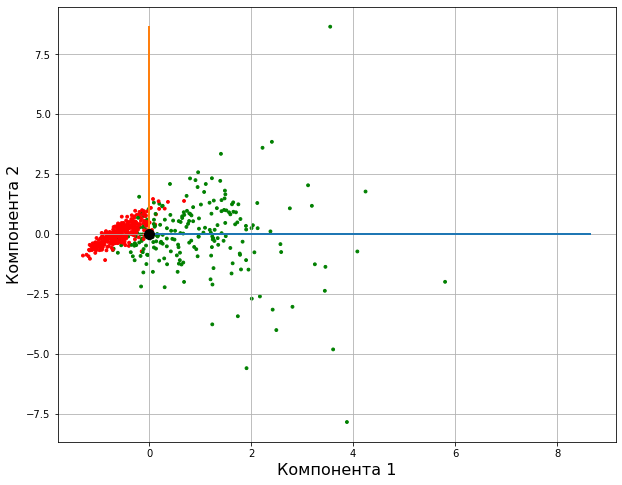

In [250]:
A = get_normalized_data_matrix(X)
vectors, std_deviations = pca(A)
Q_T = vectors.T[:2]
A_k = A @ Q_T.T
plot_data(A_k, principal_components=Q_T @ Q_T.T)

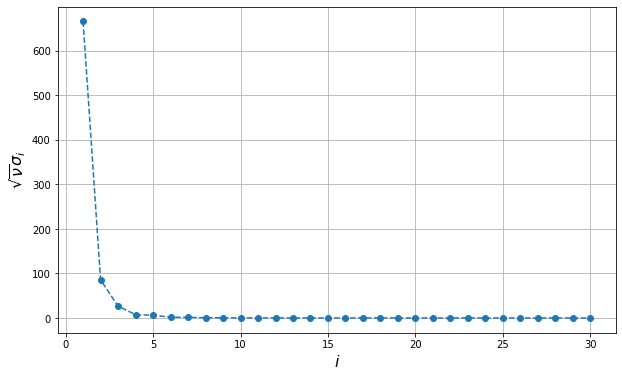

In [251]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(1. + np.arange(len(std_deviations)), std_deviations, 'o--')
ax.set_xlabel(r'$i$', fontsize=16)
ax.set_ylabel(r'$\sqrt{\nu} \sigma_i$', fontsize=16)
ax.grid()
plt.show()